In [46]:
%matplotlib inline

In [47]:
import numpy as np
data=np.load('/home/share/TmpData/Qinglin/HCP_Group/MOTOR100_0.2.npy')


In [48]:
data.shape



(5700, 228453)

In [49]:
from nilearn.decomposition.rbm import RBM

rbm1=RBM(data.shape[1],100)
rbm1.train(data)
h1=rbm1.predict(data)

rbm2=RBM(100,100)
rbm2.train(h1)
h2=rbm2.predict(h1)

rbm3=RBM(100,100)
rbm3.train(h2)

Epoch: 0 Error: 0.468531
Epoch: 1 Error: 0.478983
Epoch: 2 Error: 0.480623
Epoch: 3 Error: 0.488400
Epoch: 4 Error: 0.490086
Epoch: 5 Error: 0.489864
Epoch: 6 Error: 0.487712
Epoch: 7 Error: 0.490195
Epoch: 8 Error: 0.490299
Epoch: 9 Error: 0.490707
Epoch: 10 Error: 0.491501
Epoch: 11 Error: 0.491664
Epoch: 12 Error: 0.491489
Epoch: 13 Error: 0.489858
Epoch: 14 Error: 0.489091
Epoch: 15 Error: 0.486883
Epoch: 16 Error: 0.486907
Epoch: 17 Error: 0.486028
Epoch: 18 Error: 0.486024
Epoch: 19 Error: 0.486556
Epoch: 0 Error: 0.008904
Epoch: 1 Error: 0.008883
Epoch: 2 Error: 0.009004
Epoch: 3 Error: 0.009045
Epoch: 4 Error: 0.009228
Epoch: 5 Error: 0.009063
Epoch: 6 Error: 0.008786
Epoch: 7 Error: 0.008963
Epoch: 8 Error: 0.008854
Epoch: 9 Error: 0.008812
Epoch: 10 Error: 0.009183
Epoch: 11 Error: 0.008893
Epoch: 12 Error: 0.008885
Epoch: 13 Error: 0.009079
Epoch: 14 Error: 0.008873
Epoch: 15 Error: 0.008977
Epoch: 16 Error: 0.008784
Epoch: 17 Error: 0.008864
Epoch: 18 Error: 0.009102
Epoch:

1 plot layer1
-----------------------------------------------------------



In [50]:
#from nilearn.decomposition.rbm import getW

components_img=rbm1.getW()
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f4229680198>,
      mask_strategy='background', memory=Memory(location=None),
      memory_level=1, sample_mask=None, sessions=None, smoothing_fwhm=None,
      standardize=True, t_r=None, target_affine=None, target_shape=None,
      verbose=0)

In [51]:
components_img.shape

(228453, 100)

In [52]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:310: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

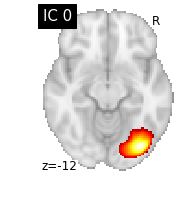

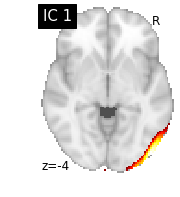

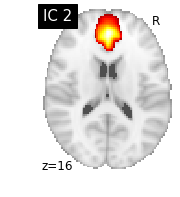

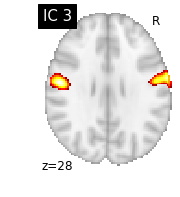

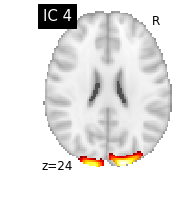

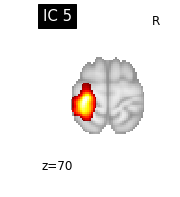

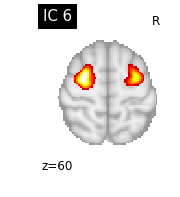

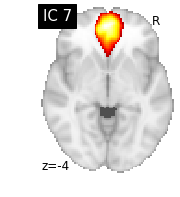

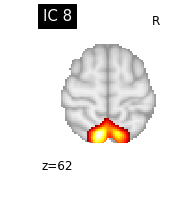

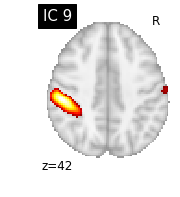

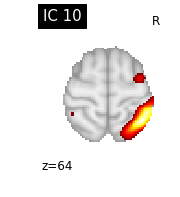

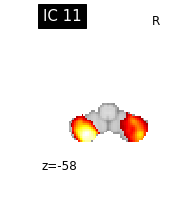

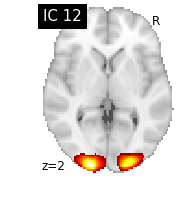

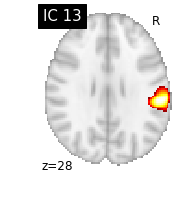

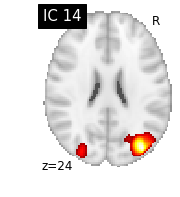

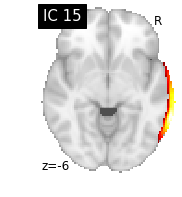

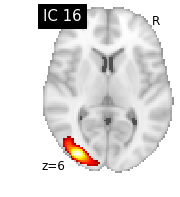

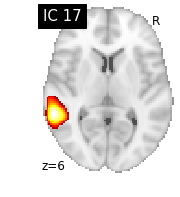

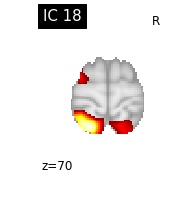

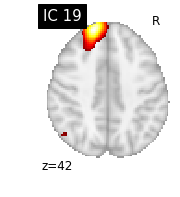

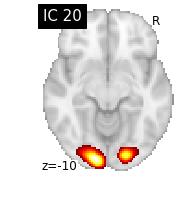

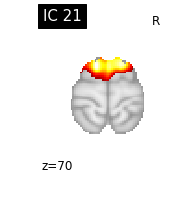

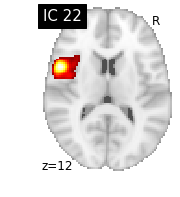

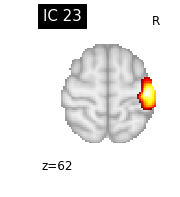

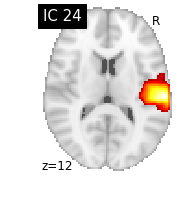

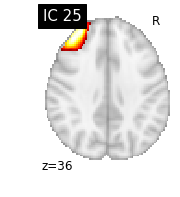

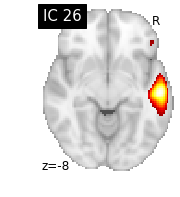

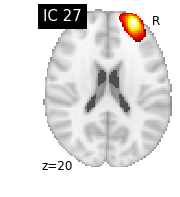

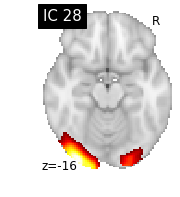

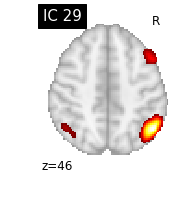

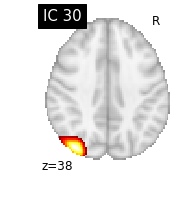

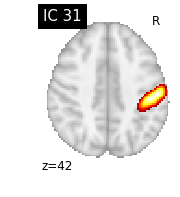

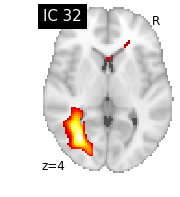

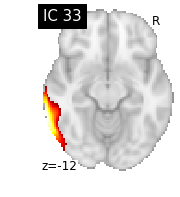

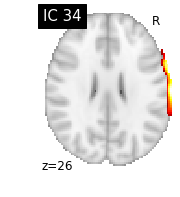

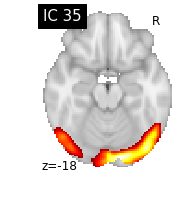

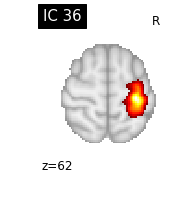

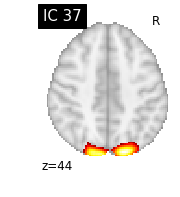

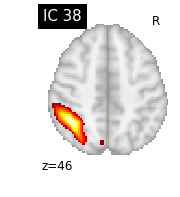

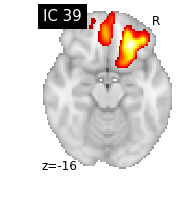

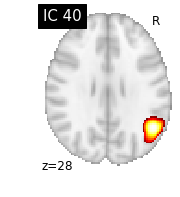

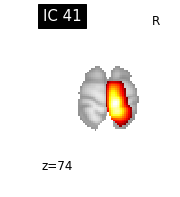

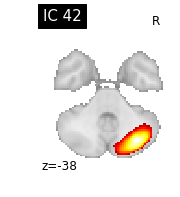

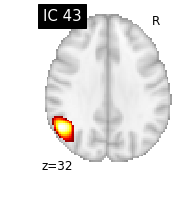

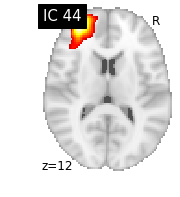

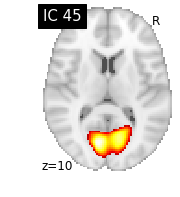

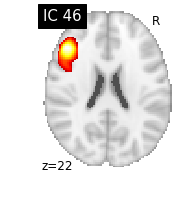

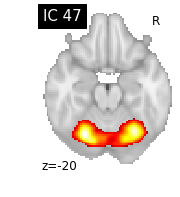

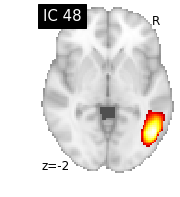

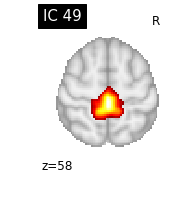

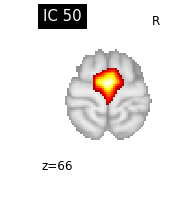

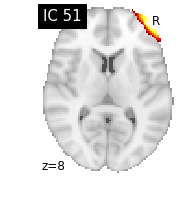

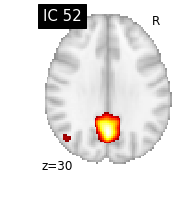

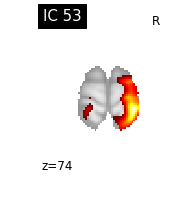

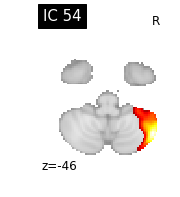

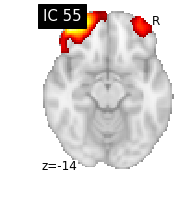

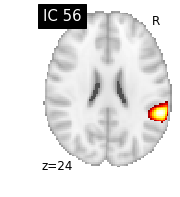

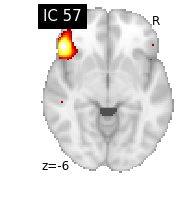

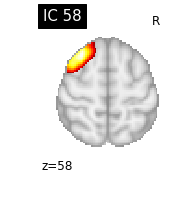

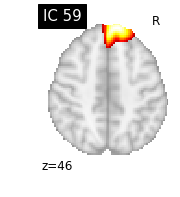

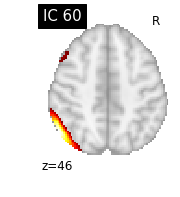

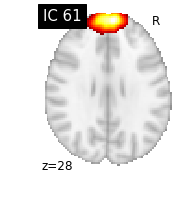

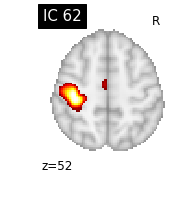

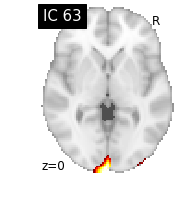

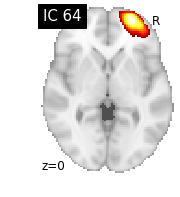

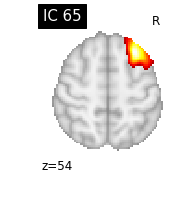

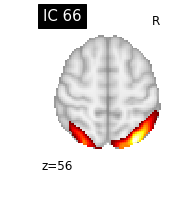

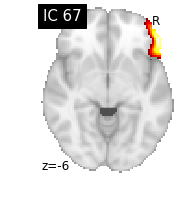

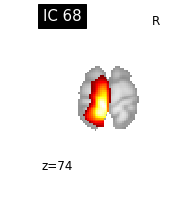

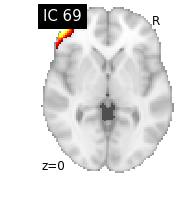

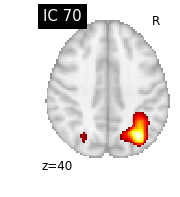

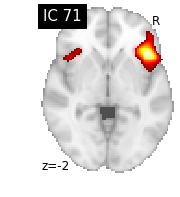

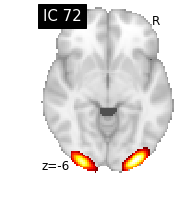

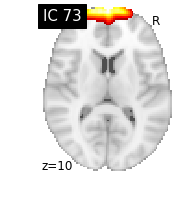

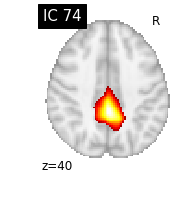

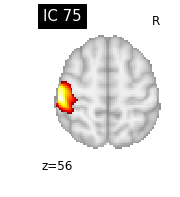

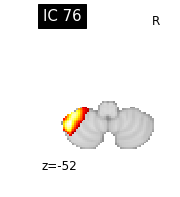

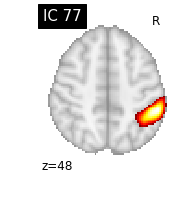

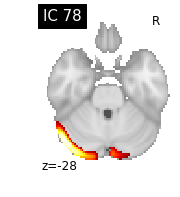

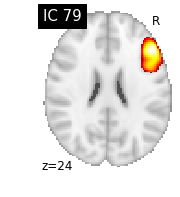

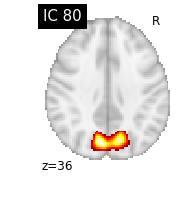

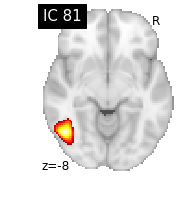

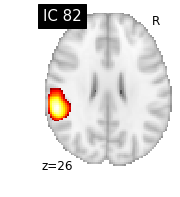

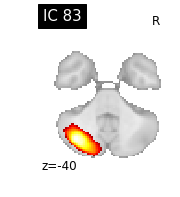

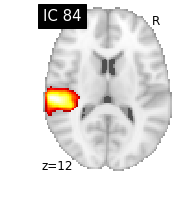

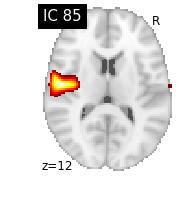

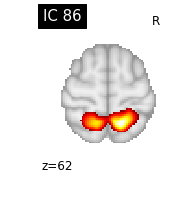

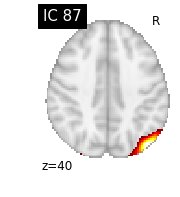

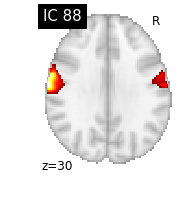

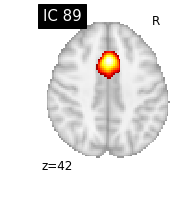

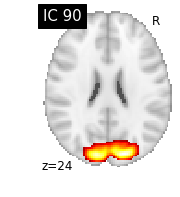

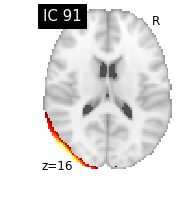

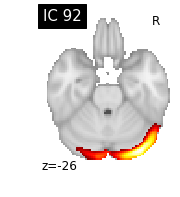

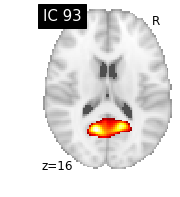

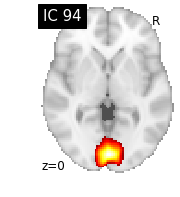

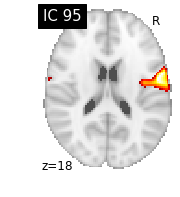

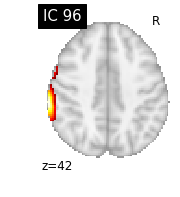

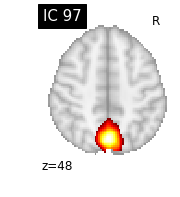

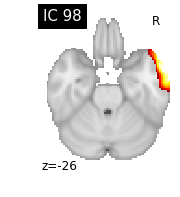

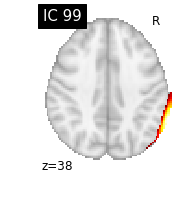

In [53]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:2785: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


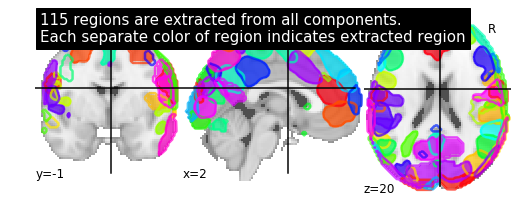

In [54]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

1 plot layer2
-----------------------------------------------------------



In [72]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)

import scipy
scipy.stats.mstats.zscore(components_img,axis=1)


array([[ 0.39952078,  0.5121617 ,  0.69754016, ..., -2.2754261 ,
        -1.8760922 , -1.8205465 ],
       [ 0.57334447,  0.640415  ,  0.7142599 , ..., -0.43185562,
        -0.28906074, -0.30407435],
       [-1.287059  , -1.4075776 , -1.3443202 , ..., -0.16004714,
        -0.19921078, -0.07594845],
       ...,
       [ 0.16569443,  0.31841433,  0.4037857 , ..., -1.8438903 ,
        -1.463509  , -1.5064325 ],
       [ 1.526914  ,  1.5302014 ,  1.8161798 , ...,  0.8091386 ,
         0.6269416 ,  0.8221765 ],
       [ 0.38093463,  0.4035596 ,  0.51298875, ...,  1.2946336 ,
         1.0694177 ,  1.2029382 ]], dtype=float32)

In [73]:
components_img[np.absolute(components_img) < 1.7] = 0
components_img = masker.inverse_transform(components_img)

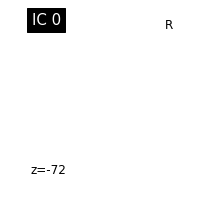

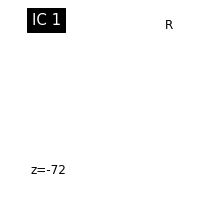

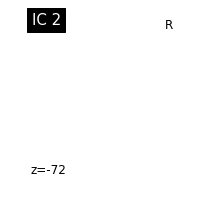

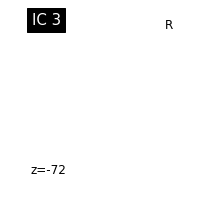

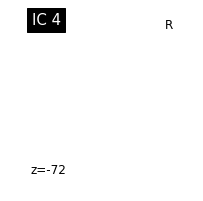

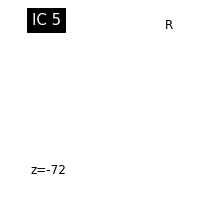

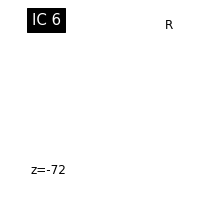

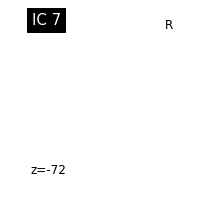

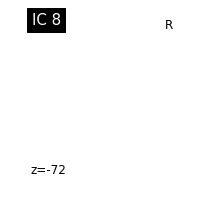

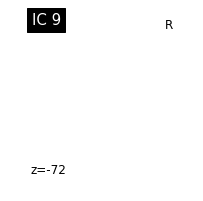

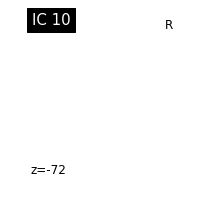

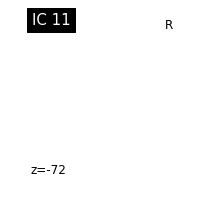

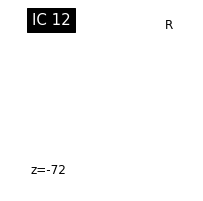

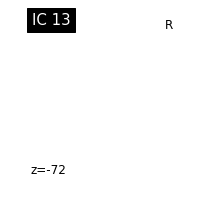

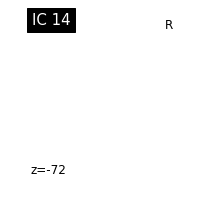

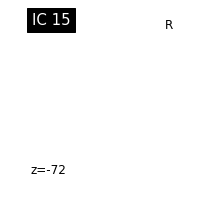

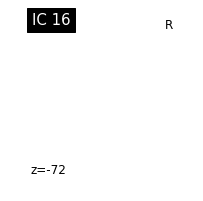

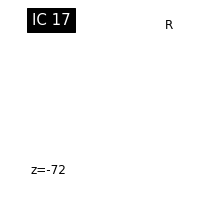

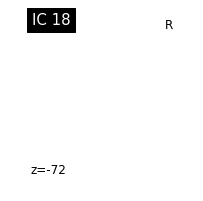

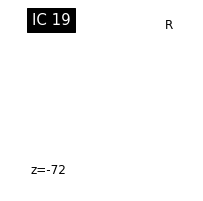

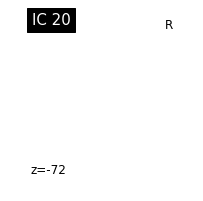

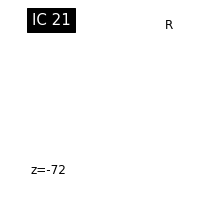

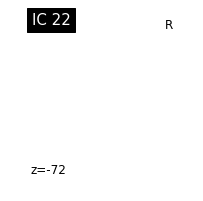

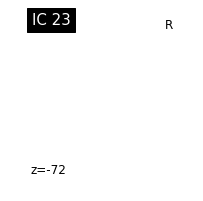

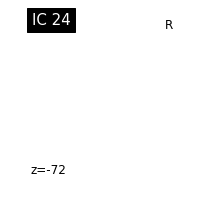

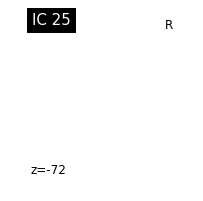

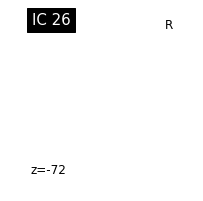

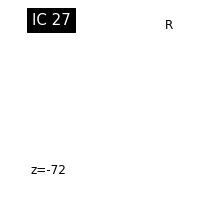

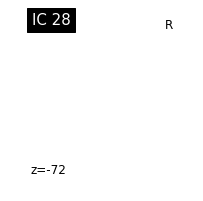

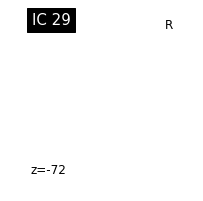

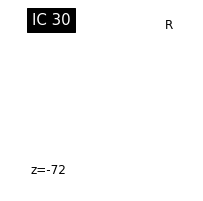

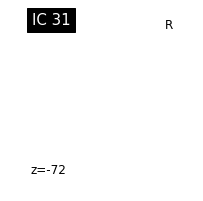

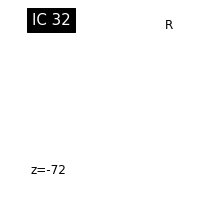

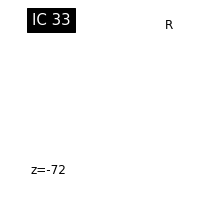

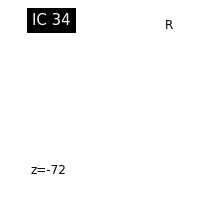

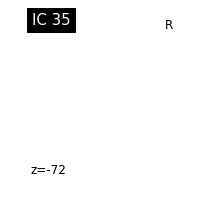

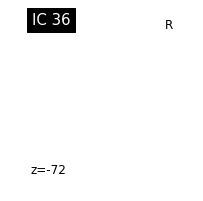

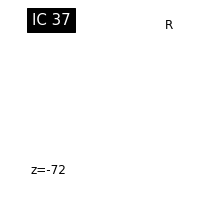

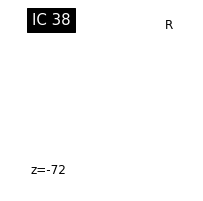

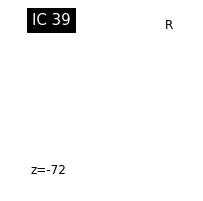

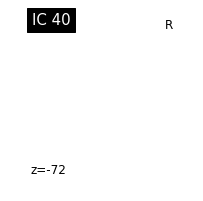

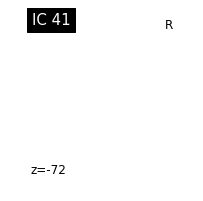

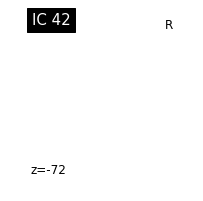

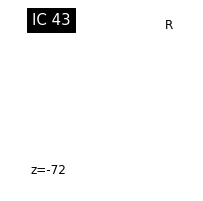

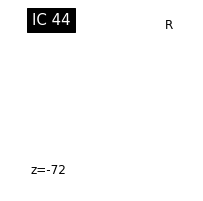

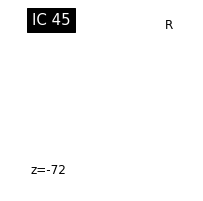

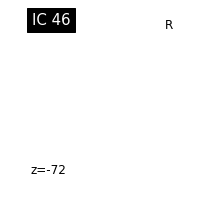

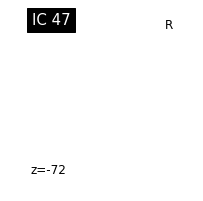

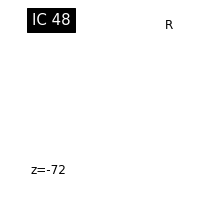

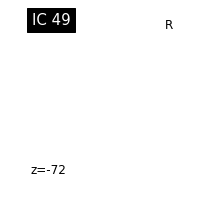

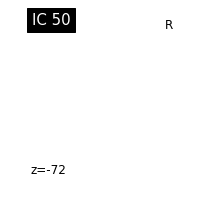

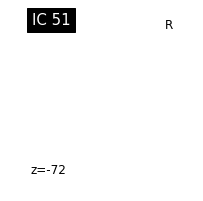

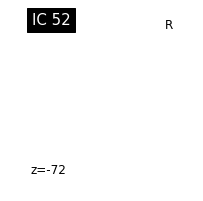

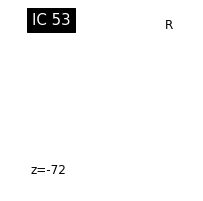

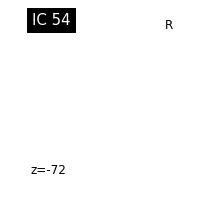

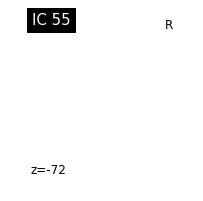

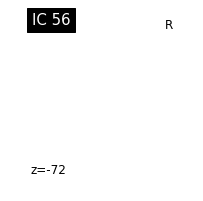

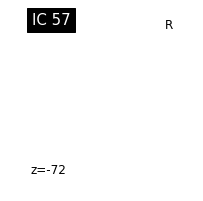

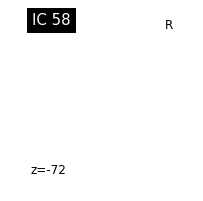

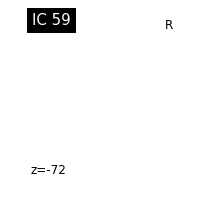

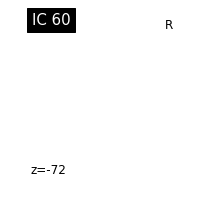

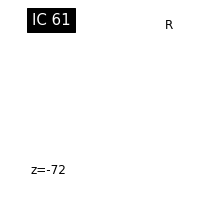

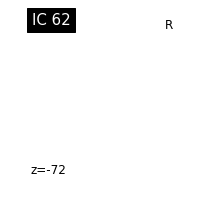

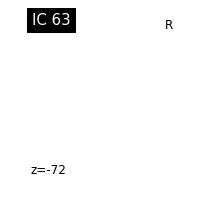

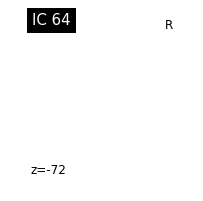

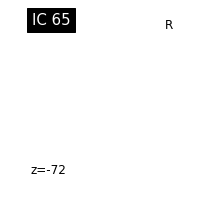

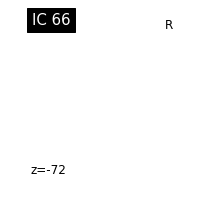

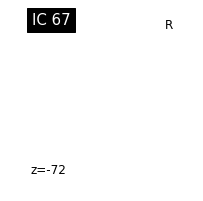

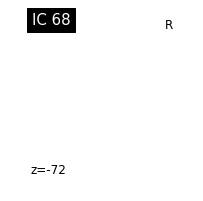

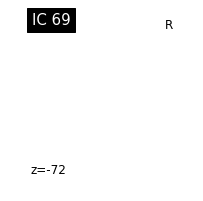

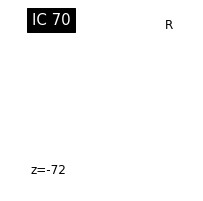

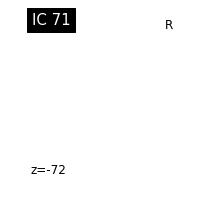

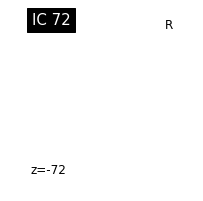

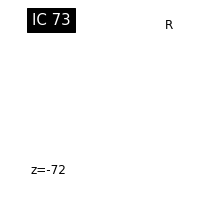

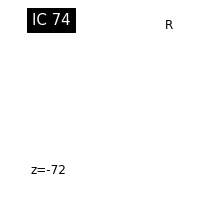

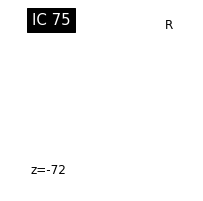

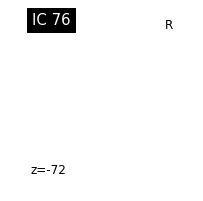

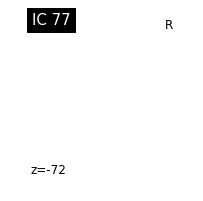

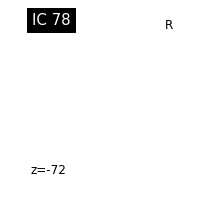

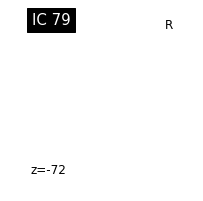

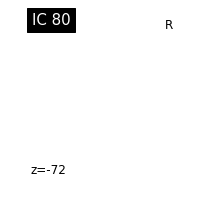

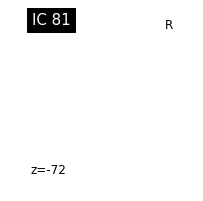

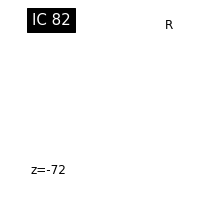

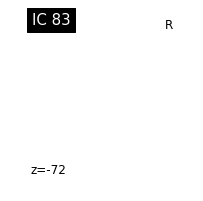

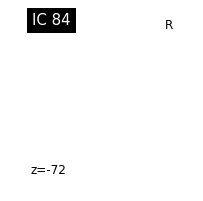

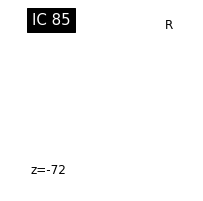

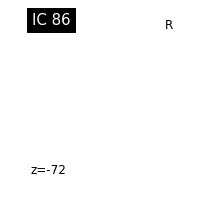

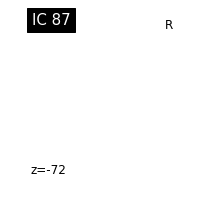

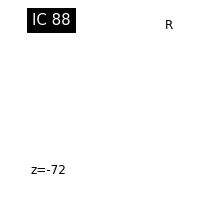

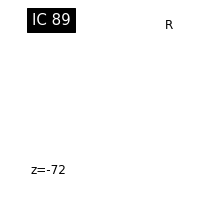

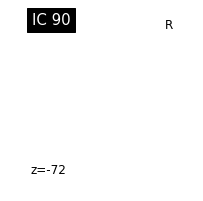

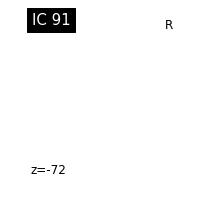

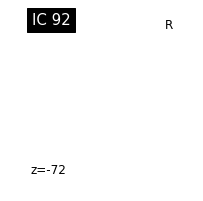

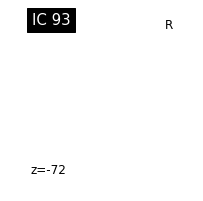

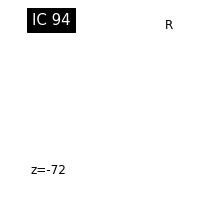

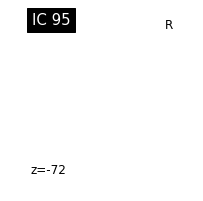

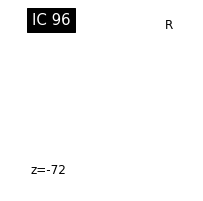

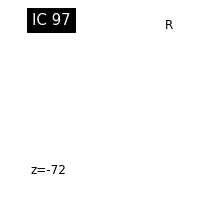

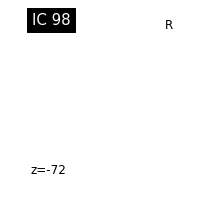

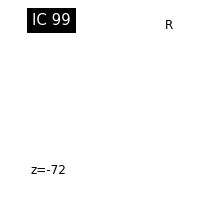

In [74]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

In [57]:
components_img.shape

(91, 109, 91, 100)

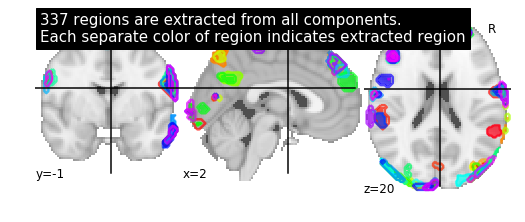

In [58]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=1000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)

1 plot layer3
-----------------------------------------------------------



In [62]:
#from nilearn.decomposition.rbm import getW

components_img=np.matmul(rbm1.getW(),rbm2.getW())
components_img=np.matmul(components_img,rbm3.getW())
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()


from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
import numpy as np
components_img=np.transpose(components_img)
#components_img=canica.thresholding(components_img)
components_img = masker.inverse_transform(components_img)

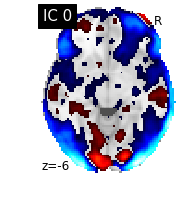

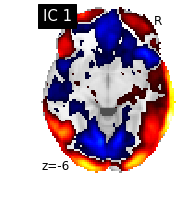

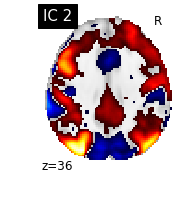

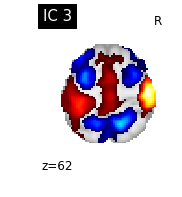

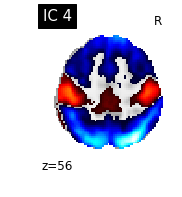

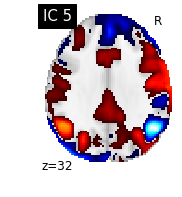

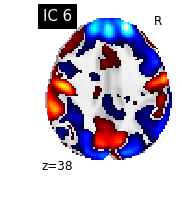

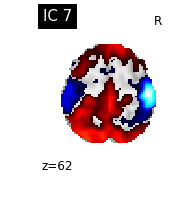

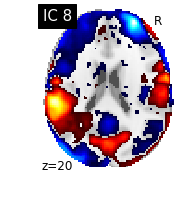

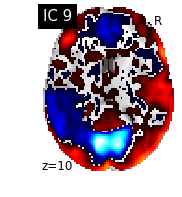

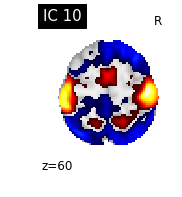

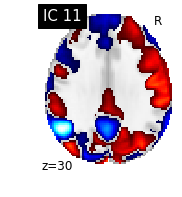

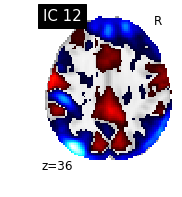

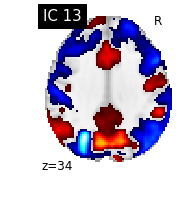

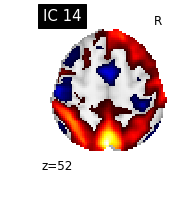

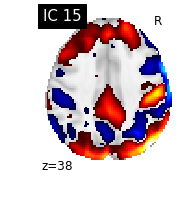

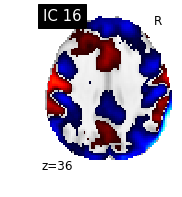

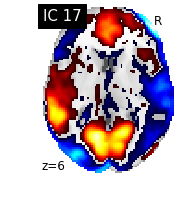

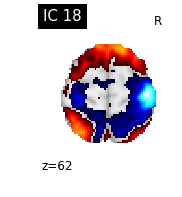

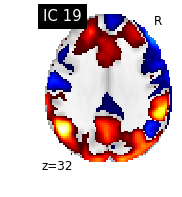

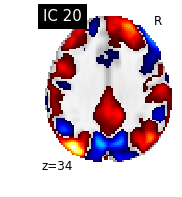

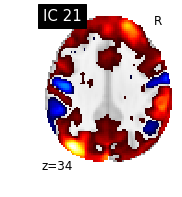

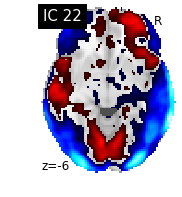

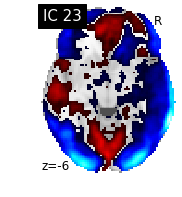

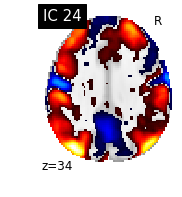

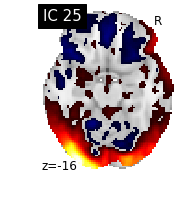

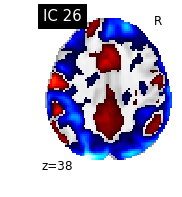

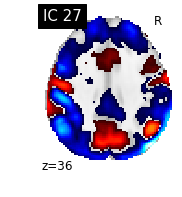

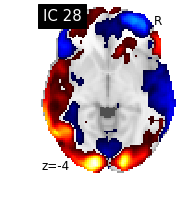

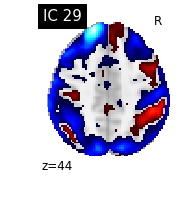

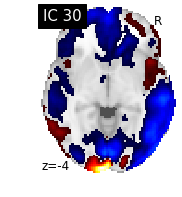

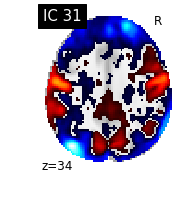

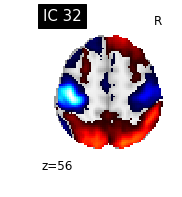

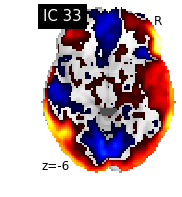

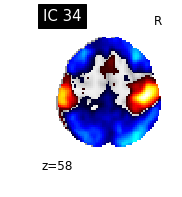

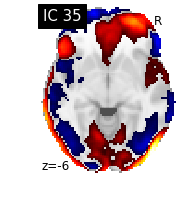

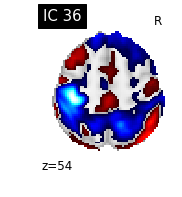

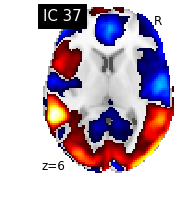

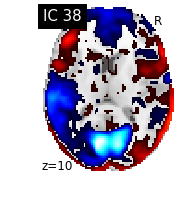

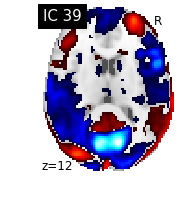

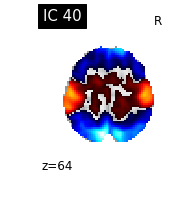

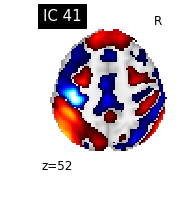

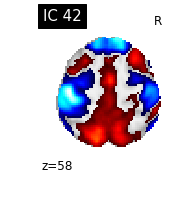

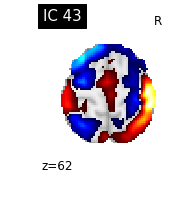

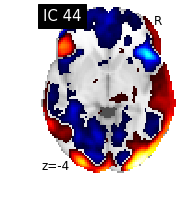

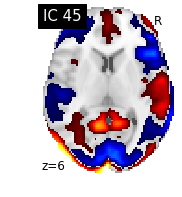

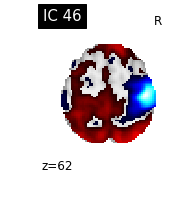

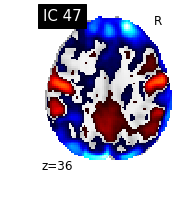

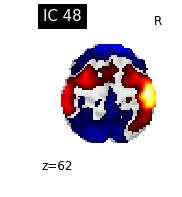

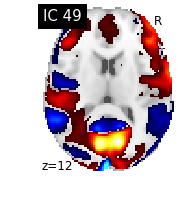

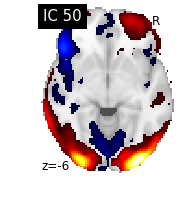

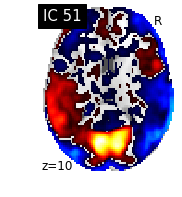

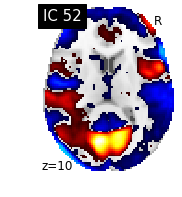

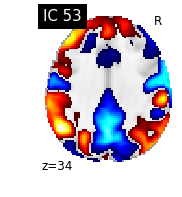

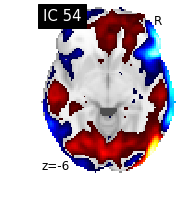

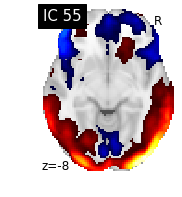

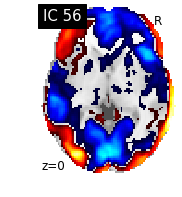

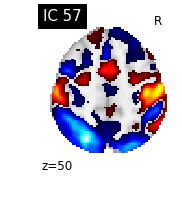

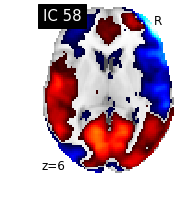

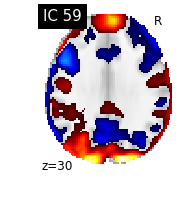

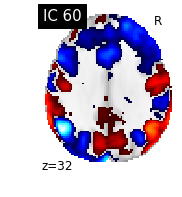

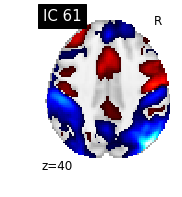

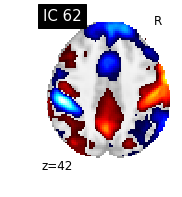

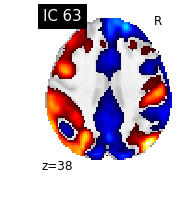

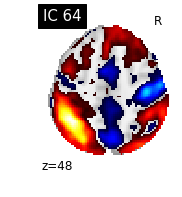

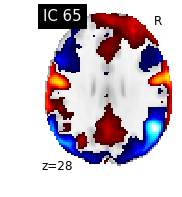

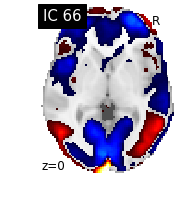

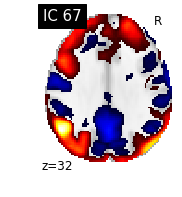

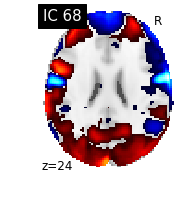

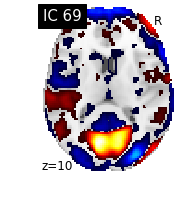

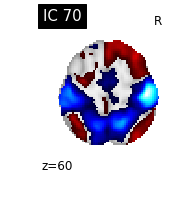

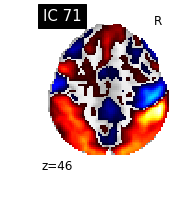

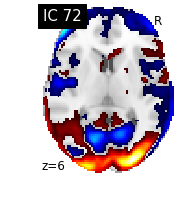

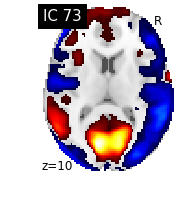

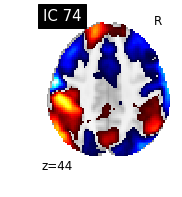

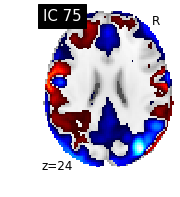

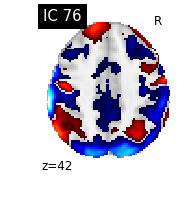

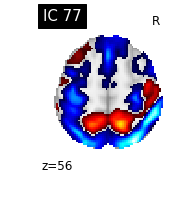

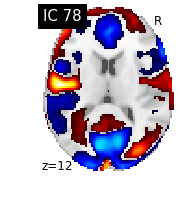

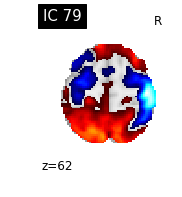

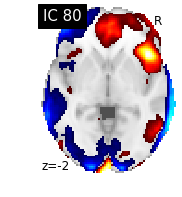

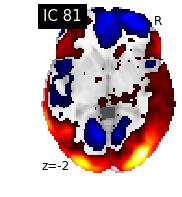

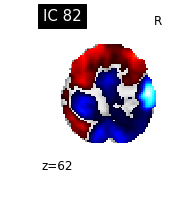

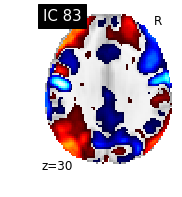

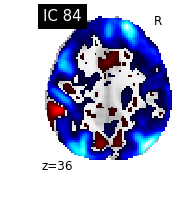

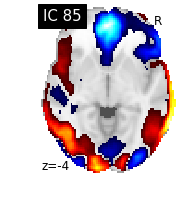

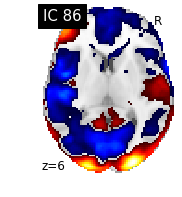

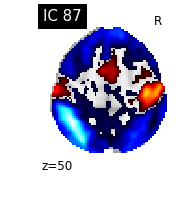

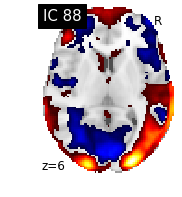

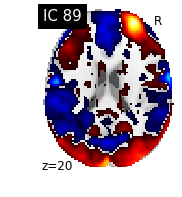

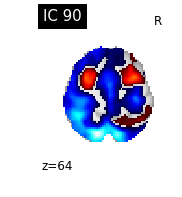

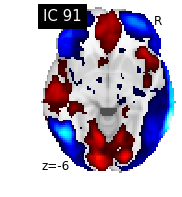

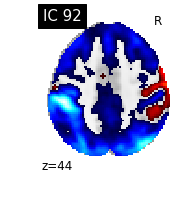

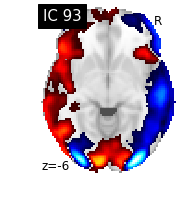

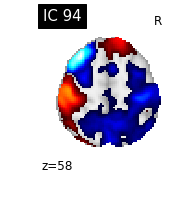

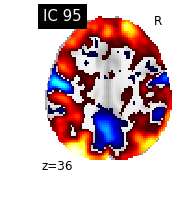

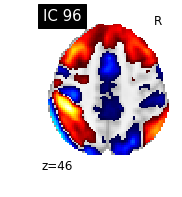

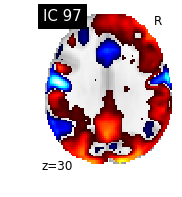

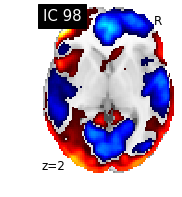

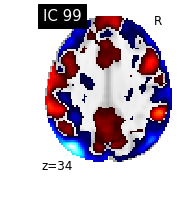

In [63]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

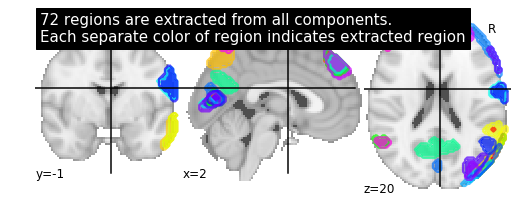

In [61]:
# Import Region Extractor algorithm from regions module
# threshold=0.5 indicates that we keep nominal of amount nonzero voxels across all
# maps, less the threshold means that more intense non-voxels will be survived.
from nilearn.regions import RegionExtractor

extractor = RegionExtractor(components_img, threshold=0.5,
                            thresholding_strategy='ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True, min_region_size=5000)
# Just call fit() to process for regions extraction
extractor.fit()
# Extracted regions are stored in regions_img_
regions_extracted_img = extractor.regions_img_
# Each region index is stored in index_
regions_index = extractor.index_
# Total number of regions extracted
n_regions_extracted = regions_extracted_img.shape[-1]

from nilearn.plotting import plot_prob_atlas
# Visualization of region extraction results
title = ('%d regions are extracted from %s components.'
         '\nEach separate color of region indicates extracted region'
         % (n_regions_extracted, 'all'))
plot_prob_atlas(regions_extracted_img, view_type='filled_contours',
                         title=title)